In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
#1 Goal - Predict total_claims_amount

In [2]:
#2 Getting the Data
data = pd.read_csv("/Users/natashabenson/Documents/Ironhack/Week_1/Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files//marketing_customer_analysis.csv",index_col=0)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
#3 Cleaning/Wrangling/EDA
#Standardize column names
col_1 = [] #List to store new column names 
for i in range(len(data.columns)):
    col_1.append(data.columns[i].lower().replace(' ', '_'))
data.columns = col_1
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
#Dealing with NaN values
display(data.isna().sum())
#State has 631 null values -> Change to a new value of other
#Response has 631 null values -> Change to No assuming there is no response
#Months since last claim has 633 null values -> Change to median.
#Number of open claims has 633 null values -> Change to median. 
#Vehicle class has 622 null values -> Drop as can't estimate the class of vehicle
#Vehicle size has 622 null values -> Drop as can't estimate the size of vehicle 
#Vehicle type has 5482 null values -> Change to other 'B type' as 50% of data is unknown therefore do not want to drop

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [5]:
#Drop null values in vehicle class
data = data[data['vehicle_class'].isna()==False]
#Drop null values in vehicle size
data = data[data['vehicle_size'].isna()==False]

In [6]:
mean_months_since_last_claim = data['months_since_last_claim'].mean()
print(mean_months_since_last_claim)
median_months_since_last_claim = data['months_since_last_claim'].median()
print(median_months_since_last_claim)
mean_number_of_open_complaints = data['number_of_open_complaints'].mean()
print(mean_number_of_open_complaints)
median_number_of_open_complaints = data['number_of_open_complaints'].median()
print(median_number_of_open_complaints)

15.125296483448489
14.0
0.3848612973084459
0.0


In [7]:
#Function to carry out neccessary transformations
def transformations(df):
    df=data.copy()
    for col in df:
        df['state']=df['state'].fillna('Other')
        df['response']=df['response'].fillna('No')
        df['months_since_last_claim']=df['months_since_last_claim'].fillna(median_months_since_last_claim)
        df['number_of_open_complaints']=df['number_of_open_complaints'].fillna(median_number_of_open_complaints)
        df['vehicle_class'].isna()==False
        df['vehicle_size'].isna()==False
        df['vehicle_type']=df['vehicle_type'].fillna('B')     
    return(df)

In [8]:
data = transformations(data)

In [9]:
display(data.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [10]:
#Exploration

No     8908
Yes    1380
Name: response, dtype: int64


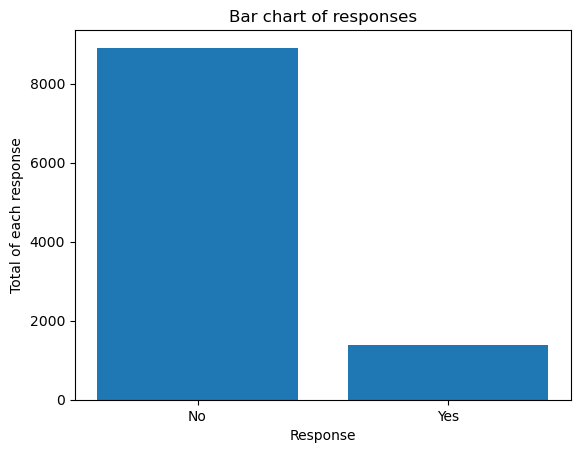

In [11]:
#Plot of the total number of responses.
print(data['response'].value_counts())
y=[sum(data['response'].isin(['No'])),sum(data['response'].isin(['Yes']))]
x=['No','Yes']
fig, ax = plt.subplots()
plt.bar(x,y)
ax.set_xlabel('Response')
ax.set_ylabel('Total of each response')
ax.set_title('Bar chart of responses')
plt.show()

Agent          3903
Branch         2847
Call Center    2017
Web            1521
Name: sales_channel, dtype: int64


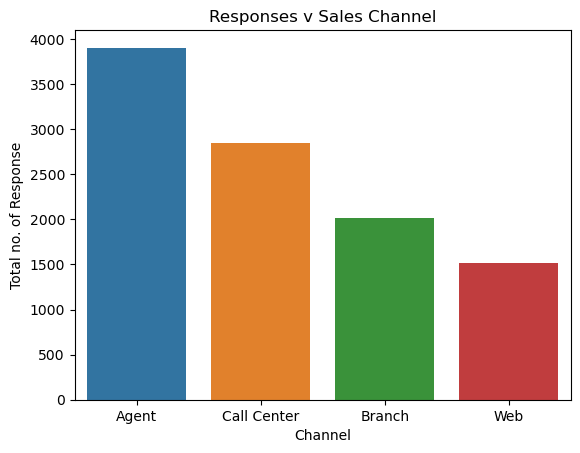

In [12]:
#Plot of the response rate by the sales channel using total no. of responses as response rate:
print(data['sales_channel'].value_counts())
channel=list(data['sales_channel'].unique())
fig, ax = plt.subplots() #Using to customise the axes/ titles
sns.barplot(x=channel, y=data['sales_channel'].value_counts())
ax.set_xlabel('Channel')
ax.set_ylabel('Total no. of Response')
ax.set_title('Responses v Sales Channel')
plt.show()

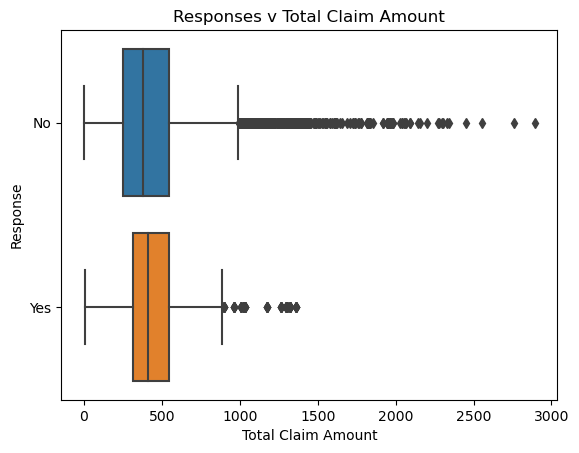

In [13]:
#Plot of responses vs total claim amount.
fig, ax = plt.subplots()
sns.boxplot(x = 'total_claim_amount',y='response', data=data)
ax.set_xlabel('Total Claim Amount')
ax.set_ylabel('Response')
ax.set_title('Responses v Total Claim Amount')
plt.show()

In [14]:
#Numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
numerical = data._get_numeric_data()
display(numerical)
categoricals = data.select_dtypes(['object'])
display(categoricals)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,B
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,B
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,B
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


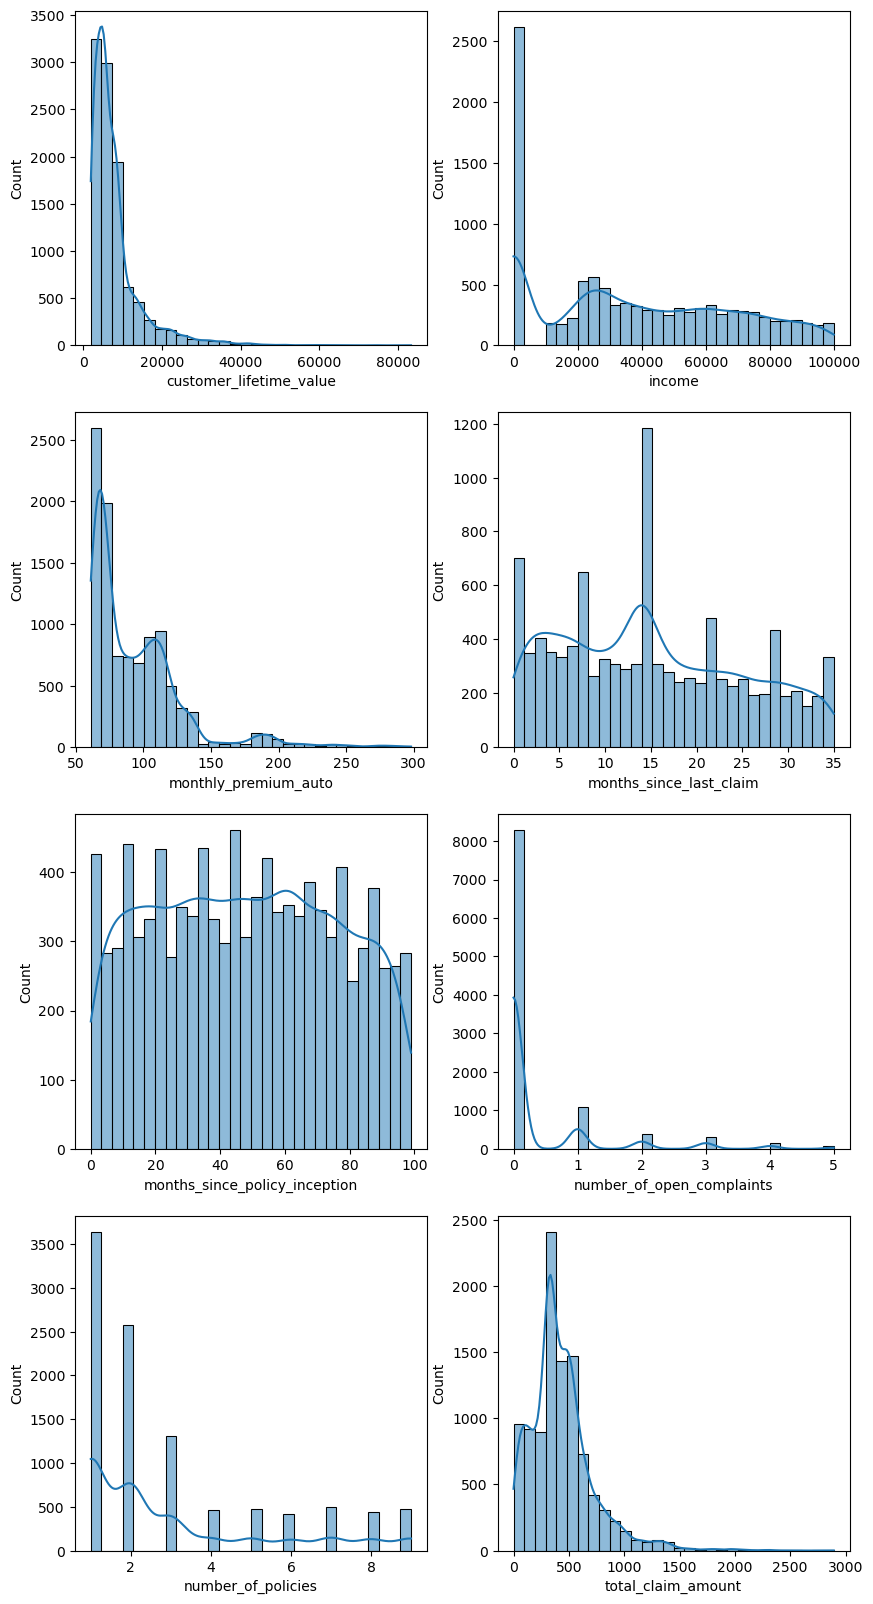

In [18]:
#Check the normality of the numerical variables visually

f, axes = plt.subplots(4, 2,figsize=(10,20))
sns.histplot(numerical['customer_lifetime_value'],bins=30, kde=True, ax=axes[0][0])
sns.histplot(numerical['income'],bins=30,kde=True,ax=axes[0][1])
sns.histplot(numerical['monthly_premium_auto'],bins=30,kde=True,ax=axes[1][0])
sns.histplot(numerical['months_since_last_claim'],bins=30,kde=True,ax=axes[1][1])
sns.histplot(numerical['months_since_policy_inception'],bins=30,kde=True,ax=axes[2][0])
sns.histplot(numerical['number_of_open_complaints'],bins=30,kde=True,ax=axes[2][1])
sns.histplot(numerical['number_of_policies'],bins=30,kde=True,ax=axes[3][0])
sns.histplot(numerical['total_claim_amount'],bins=30,kde=True,ax=axes[3][1])
plt.show()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000,0.025,0.398,0.012,0.018,-0.037,0.020,0.227
income,0.025,1.000,-0.016,-0.027,-0.002,0.011,-0.010,-0.358
monthly_premium_auto,0.398,-0.016,1.000,0.006,0.018,-0.013,-0.015,0.632
months_since_last_claim,0.012,-0.027,0.006,1.000,-0.041,0.004,0.009,0.010
months_since_policy_inception,0.018,-0.002,0.018,-0.041,1.000,0.000,-0.012,-0.000
number_of_open_complaints,-0.037,0.011,-0.013,0.004,0.000,1.000,0.001,-0.017
number_of_policies,0.020,-0.010,-0.015,0.009,-0.012,0.001,1.000,-0.005
total_claim_amount,0.227,-0.358,0.632,0.010,-0.000,-0.017,-0.005,1.000


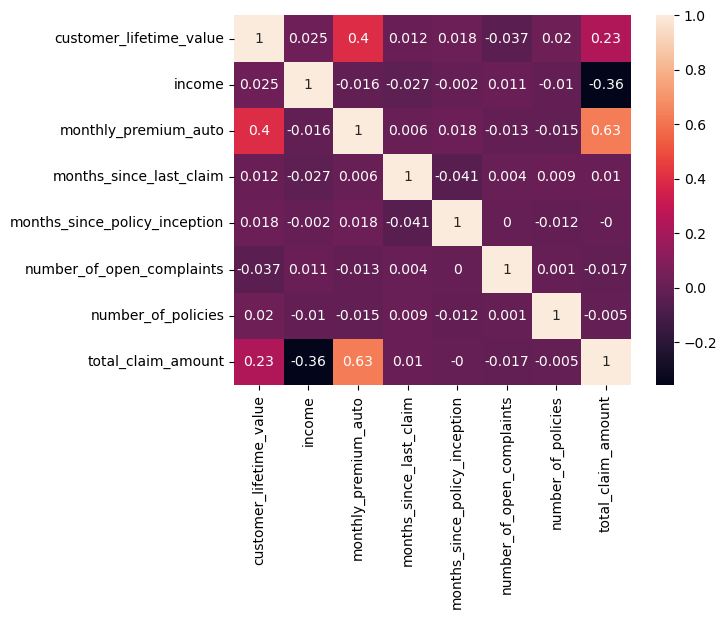

In [17]:
#For the numerical variables, check the multicollinearity between the features. 
correlations_matrix = round(numerical.corr(),3)
display(correlations_matrix)
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#No features show high correlation (greater than 0.9)

In [ ]:
#4 Processing Data

In [ ]:
#Dealing with outliers

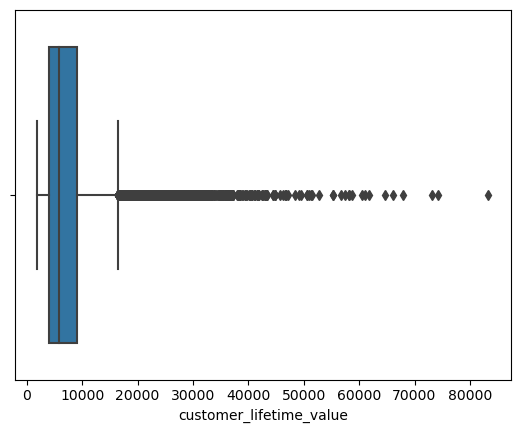

In [19]:
#Customer_lifetime_value has a few outliers that could be removed
sns.boxplot(x=data['customer_lifetime_value'])
plt.show()

In [20]:
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr #upper whisker 
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr #lower whisker

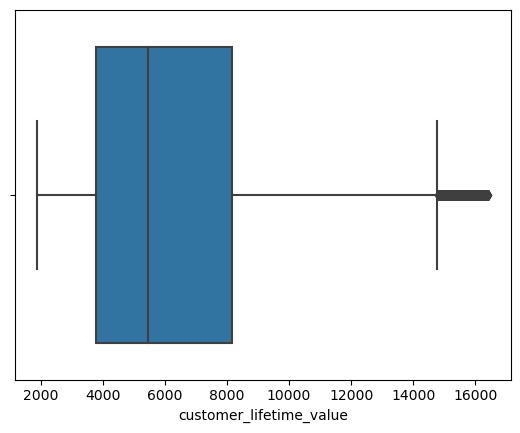

In [21]:
data2 = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]
sns.boxplot(x=data2['customer_lifetime_value'])
plt.show()

In [ ]:
#Normalization

In [43]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

def normal (df2):
    df2=data2.copy()
    #X-y split
    numerical = df2._get_numeric_data()
    X=numerical.drop(['total_claim_amount'], axis=1)
    y = numerical['total_claim_amount'] 
    #Normalize numerical column
    transformer = MinMaxScaler()
    transformer.fit(X)
    x_normalized = transformer.transform(X)
    X=pd.DataFrame(x_normalized,columns=X.columns) 
    return(X, y) 

In [44]:
X, y = normal(data2)

In [45]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.200551,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.022769,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.899000,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.490978,0.236795,0.236287,0.400000,0.313131,0.0,0.750
4,0.196140,0.505586,0.000000,0.057143,0.737374,0.0,0.750
...,...,...,...,...,...,...,...
9367,0.060186,0.598664,0.054852,0.857143,0.828283,0.8,0.000
9368,0.941398,0.000000,0.810127,0.400000,0.404040,0.0,0.750
9369,0.231567,0.611576,0.016878,0.200000,0.686869,0.0,0.625
9370,0.693989,0.642072,0.409283,0.000000,0.272727,0.8,0.625


In [33]:
y

0         292.800000
1         744.924331
2         480.000000
4         707.925645
5         292.800000
            ...     
10903     355.200000
10905    1214.400000
10906     273.018929
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 9372, dtype: float64

In [50]:
#Train/fit the model
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [47]:
#Model Validation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

In [51]:
#R^2
#Train Set
print(r2_score(y_train, y_pred_train))
#Test Set
print(r2_score(y_test, y_pred_test))

0.4954666699888619
0.5006046560712598


In [52]:
#MSE
#Train Set
print(mean_squared_error(y_train,y_pred_train))
#Test Set
print(mean_squared_error(y_test,y_pred_test))

38418.75221019013
39768.01500667852


In [53]:
#RMSE
#Train Set
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
#Test Set
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

196.00702081861795
199.41919417818968


In [54]:
#MAE
#Train Set
print(mean_absolute_error(y_train, y_pred_train))
#Test Set
print(mean_absolute_error(y_test, y_pred_test))

141.44681829988514
142.5463579248126
